# ERA5 Data Aral Sea - HBV 

In [8]:
# General python
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

# Niceties
from rich import print

# General eWaterCycle
import ewatercycle
import ewatercycle.forcing
import ewatercycle.models

In [9]:
# The name of the shapefile
shape_file_name = "AralSeaBasin"  # river: Bedford Ouse at Roxton, England

# The time-window of the experiment
experiment_start_date="1950-01-01T00:00:00Z"
experiment_end_date="2000-12-31T00:00:00Z"

forcing_path_ERA5 = (
    Path.cwd()
    / "forcing_Basin_HBV_5000"
    / shape_file_name
    / "ERA5"
    / "own_shapefile"
)

# The path save directory of the ERA5 data
#forcing_path_ERA5 = Path.home() / "projects/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Aral_Test/forcing" / shape_file_name / "ERA5" / "own_shapefile"
#forcing_path_ERA5.mkdir(exist_ok=True)
forcing_path_ERA5.mkdir(parents=True, exist_ok=True)

In [10]:
Path.cwd()

PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral')

In [11]:
shapefile_path = (
    Path("/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/AralSea_Basin")
    / f"{shape_file_name}.shp"
)




In [12]:
ERA5_forcing = ewatercycle.forcing.sources["LumpedMakkinkForcing"].generate(
   dataset="ERA5",
   start_time=experiment_start_date,
   end_time=experiment_end_date,
   shape=shapefile_path,
   directory=forcing_path_ERA5,
)


In [13]:
print(ERA5_forcing)

LumpedMakkinkForcing(
    start_time='1950-01-01T00:00:00Z',
    end_time='2000-12-31T00:00:00Z',
    directory=PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in
_progress/Test_Aral/forcing_Basin_HBV_5000/AralSeaBasin/ERA5/own_shapefile/work/diagnostic/script'),
    shape=PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_pro
gress/Test_Aral/AralSea_Basin/AralSeaBasin.shp'),
    filenames={
        'pr': 'OBS6_ERA5_reanaly_1_day_pr_1950-2000.nc',
        'tas': 'OBS6_ERA5_reanaly_1_day_tas_1950-2000.nc',
        'rsds': 'OBS6_ERA5_reanaly_1_day_rsds_1950-2000.nc',
        'evspsblpot': 'Derived_Makkink_evspsblpot.nc'
    }
)

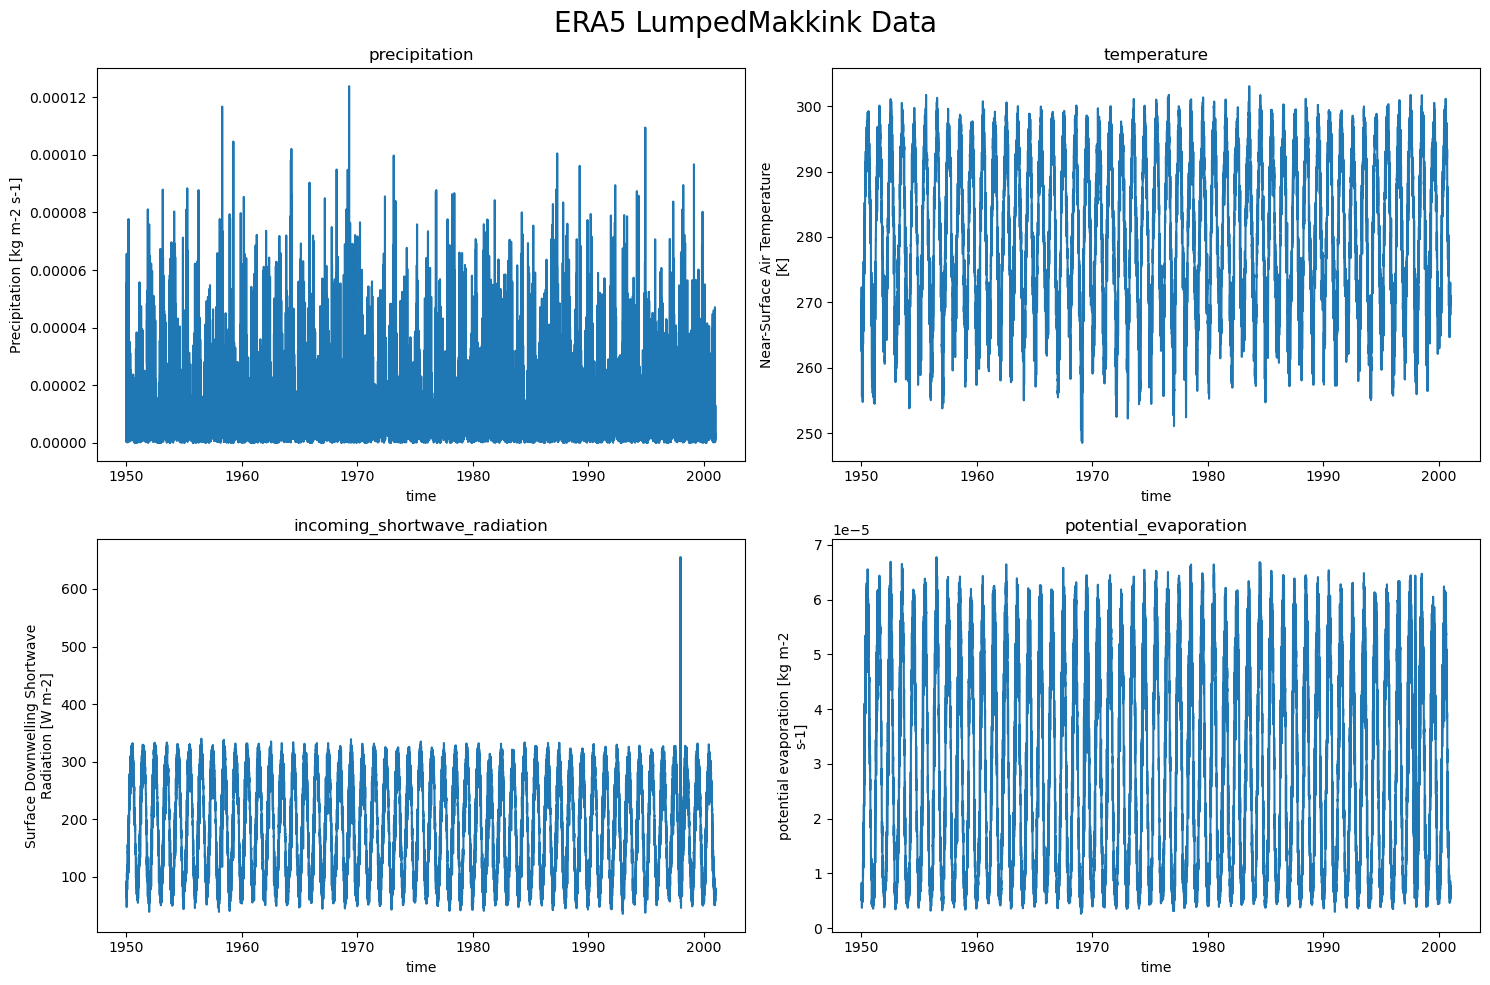

In [14]:
ERA5_data = {'precipitation pr': xr.open_dataset(ERA5_forcing['pr']),
             'temperature tas': xr.open_dataset(ERA5_forcing['tas']),
             'incoming_shortwave_radiation rsds': xr.open_dataset(ERA5_forcing['rsds']),
             'potential_evaporation evspsblpot': xr.open_dataset(ERA5_forcing['evspsblpot'])
}

plot_counter = 1
plt.figure(figsize=(15, 10))
for name, data in ERA5_data.items():
    plt.subplot(2,2, plot_counter)
    data[name.split(" ")[-1]].plot()
    plt.title(f"{name.split(" ")[0]}")
    plot_counter += 1

plt.suptitle("ERA5 LumpedMakkink Data", fontsize=20)
plt.tight_layout()